<a href="https://colab.research.google.com/github/Trieu1020/baitapAI1/blob/main/AI12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 8.5 MB/s eta 0:00:00


Final Price: 93.0


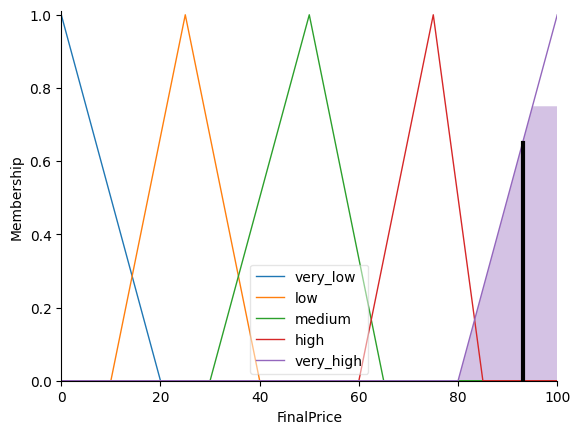

In [3]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


NeedsLevel = ctrl.Antecedent(np.arange(0, 101, 1), 'NeedsLevel')
CompetitorPrice = ctrl.Antecedent(np.arange(0, 101, 1), 'CompetitorPrice')
ProductionCost = ctrl.Antecedent(np.arange(0, 101, 1), 'ProductionCost')
Seasonality = ctrl.Antecedent(np.arange(0, 11, 1), 'Seasonality')
StockLevel = ctrl.Antecedent(np.arange(0, 101, 1), 'StockLevel')

FinalPrice = ctrl.Consequent(np.arange(0, 101, 1), 'FinalPrice')

NeedsLevel['low'] = fuzz.trimf(NeedsLevel.universe, [0, 0, 40])
NeedsLevel['medium'] = fuzz.trimf(NeedsLevel.universe, [30, 50, 70])
NeedsLevel['high'] = fuzz.trimf(NeedsLevel.universe, [60, 100, 100])

CompetitorPrice['low'] = fuzz.trimf(CompetitorPrice.universe, [0, 0, 40])
CompetitorPrice['medium'] = fuzz.trimf(CompetitorPrice.universe, [30, 50, 70])
CompetitorPrice['high'] = fuzz.trimf(CompetitorPrice.universe, [60, 100, 100])

ProductionCost['low'] = fuzz.trimf(ProductionCost.universe, [0, 0, 40])
ProductionCost['medium'] = fuzz.trimf(ProductionCost.universe, [30, 50, 70])
ProductionCost['high'] = fuzz.trimf(ProductionCost.universe, [60, 100, 100])

StockLevel['low'] = fuzz.trimf(StockLevel.universe, [0, 0, 40])
StockLevel['medium'] = fuzz.trimf(StockLevel.universe, [30, 50, 70])
StockLevel['high'] = fuzz.trimf(StockLevel.universe, [60, 100, 100])

Seasonality['off_peak'] = fuzz.trimf(Seasonality.universe, [0, 0, 3])
Seasonality['normal'] = fuzz.trimf(Seasonality.universe, [2, 5, 7])
Seasonality['peak'] = fuzz.trimf(Seasonality.universe, [6, 10, 10])

FinalPrice['very_low'] = fuzz.trimf(FinalPrice.universe, [0, 0, 20])
FinalPrice['low'] = fuzz.trimf(FinalPrice.universe, [10, 25, 40])
FinalPrice['medium'] = fuzz.trimf(FinalPrice.universe, [30, 50, 65])
FinalPrice['high'] = fuzz.trimf(FinalPrice.universe, [60, 75, 85])
FinalPrice['very_high'] = fuzz.trimf(FinalPrice.universe, [80, 100, 100])

rules = [
    ctrl.Rule(NeedsLevel['high'] & CompetitorPrice['high'] & StockLevel['low'], FinalPrice['very_high']),
    ctrl.Rule(NeedsLevel['high'] & Seasonality['peak'] & StockLevel['low'], FinalPrice['very_high']),
    ctrl.Rule(NeedsLevel['medium'] & ProductionCost['high'] & StockLevel['low'], FinalPrice['very_high']),

    ctrl.Rule(NeedsLevel['high'] & CompetitorPrice['medium'] & StockLevel['medium'], FinalPrice['high']),
    ctrl.Rule(NeedsLevel['medium'] & CompetitorPrice['high'] & StockLevel['low'], FinalPrice['high']),
    ctrl.Rule(NeedsLevel['medium'] & Seasonality['peak'] & StockLevel['medium'], FinalPrice['high']),

    ctrl.Rule(NeedsLevel['medium'] & CompetitorPrice['medium'] & StockLevel['medium'], FinalPrice['medium']),
    ctrl.Rule(NeedsLevel['medium'] & CompetitorPrice['high'] & StockLevel['medium'], FinalPrice['medium']),
    ctrl.Rule(NeedsLevel['low'] & CompetitorPrice['high'] & StockLevel['medium'], FinalPrice['medium']),
    ctrl.Rule(NeedsLevel['medium'] & ProductionCost['medium'] & StockLevel['medium'], FinalPrice['medium']),

    ctrl.Rule(NeedsLevel['low'] & CompetitorPrice['low'] & StockLevel['high'], FinalPrice['low']),
    ctrl.Rule(NeedsLevel['medium'] & ProductionCost['medium'] & StockLevel['high'], FinalPrice['low']),
    ctrl.Rule(NeedsLevel['low'] & Seasonality['off_peak'] & StockLevel['high'], FinalPrice['low']),

    ctrl.Rule(NeedsLevel['low'] & CompetitorPrice['low'] & StockLevel['high'], FinalPrice['very_low']),
    ctrl.Rule(NeedsLevel['low'] & Seasonality['off_peak'] & StockLevel['high'], FinalPrice['very_low']),
    ctrl.Rule(NeedsLevel['medium'] & CompetitorPrice['low'] & StockLevel['high'], FinalPrice['very_low']),
]

ctrl_sys = ctrl.ControlSystem(rules)
FinalPriceDecision_sys = ctrl.ControlSystemSimulation(ctrl_sys)

FinalPriceDecision_sys.input['NeedsLevel']= 90
FinalPriceDecision_sys.input['CompetitorPrice']= 95
FinalPriceDecision_sys.input['ProductionCost']=40
FinalPriceDecision_sys.input['Seasonality']=9
FinalPriceDecision_sys.input['StockLevel']=10

FinalPriceDecision_sys.compute()

print('Final Price:',FinalPriceDecision_sys.output['FinalPrice'])
FinalPrice.view(sim=FinalPriceDecision_sys)